# Module 4 — Session 3  
## Decision Tree, Random Forest, Gini Impurity, Entropy

## Exercise 1 — Gini Impurity & Shannon Entropy

Parent node has:
- 60 samples class A
- 40 samples class B
Total = 100

We compute:
- Gini = 1 – (PA² + PB²)
- Entropy = – (PA log2(PA) + PB log2(PB))

In [1]:
import math

PA = 0.6
PB = 0.4

gini_parent = 1 - (PA**2 + PB**2)
entropy_parent = -(PA*math.log2(PA) + PB*math.log2(PB))

gini_parent, entropy_parent


(0.48, 0.9709505944546686)

### Split Calculations

Split 1:
Child 1 → 40 A, 0 B  
Child 2 → 20 A, 40 B  

Split 2:
Child 1 → 20 A, 40 B  
Child 2 → 40 A, 0 B  

In [2]:
def gini(a, b):
    total = a + b
    if total == 0:
        return 0
    pa = a / total
    pb = b / total
    return 1 - (pa**2 + pb**2)

def entropy(a, b):
    total = a + b
    if total == 0:
        return 0
    pa = a / total
    pb = b / total
    val = 0
    if pa > 0:
        val -= pa * math.log2(pa)
    if pb > 0:
        val -= pb * math.log2(pb)
    return val

# Parent
g_parent = gini(60,40)
h_parent = entropy(60,40)

# Split 1
g_c1 = gini(40,0)
g_c2 = gini(20,40)

h_c1 = entropy(40,0)
h_c2 = entropy(20,40)

IG_gini_split1 = g_parent - (40/100)*g_c1 - (60/100)*g_c2
IG_entropy_split1 = h_parent - (40/100)*h_c1 - (60/100)*h_c2

IG_gini_split1, IG_entropy_split1

(0.21333333333333332, 0.4199730940219749)

### Conclusion for Exercise 1
Both splits give exactly the same Information Gain.
Therefore, the model may choose any of them.

In [5]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")

features = ["pclass","sex","age","sibsp","parch","fare","embarked"]
df = df[features + ["survived"]]

df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df["sex"] = df["sex"].map({"male":0, "female":1})
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

df = df.dropna()

X = df.drop(columns=["survived"])
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [6]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

Decision Tree Accuracy: 0.7668161434977578
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       137
           1       0.77      0.57      0.65        86

    accuracy                           0.77       223
   macro avg       0.77      0.73      0.74       223
weighted avg       0.77      0.77      0.76       223



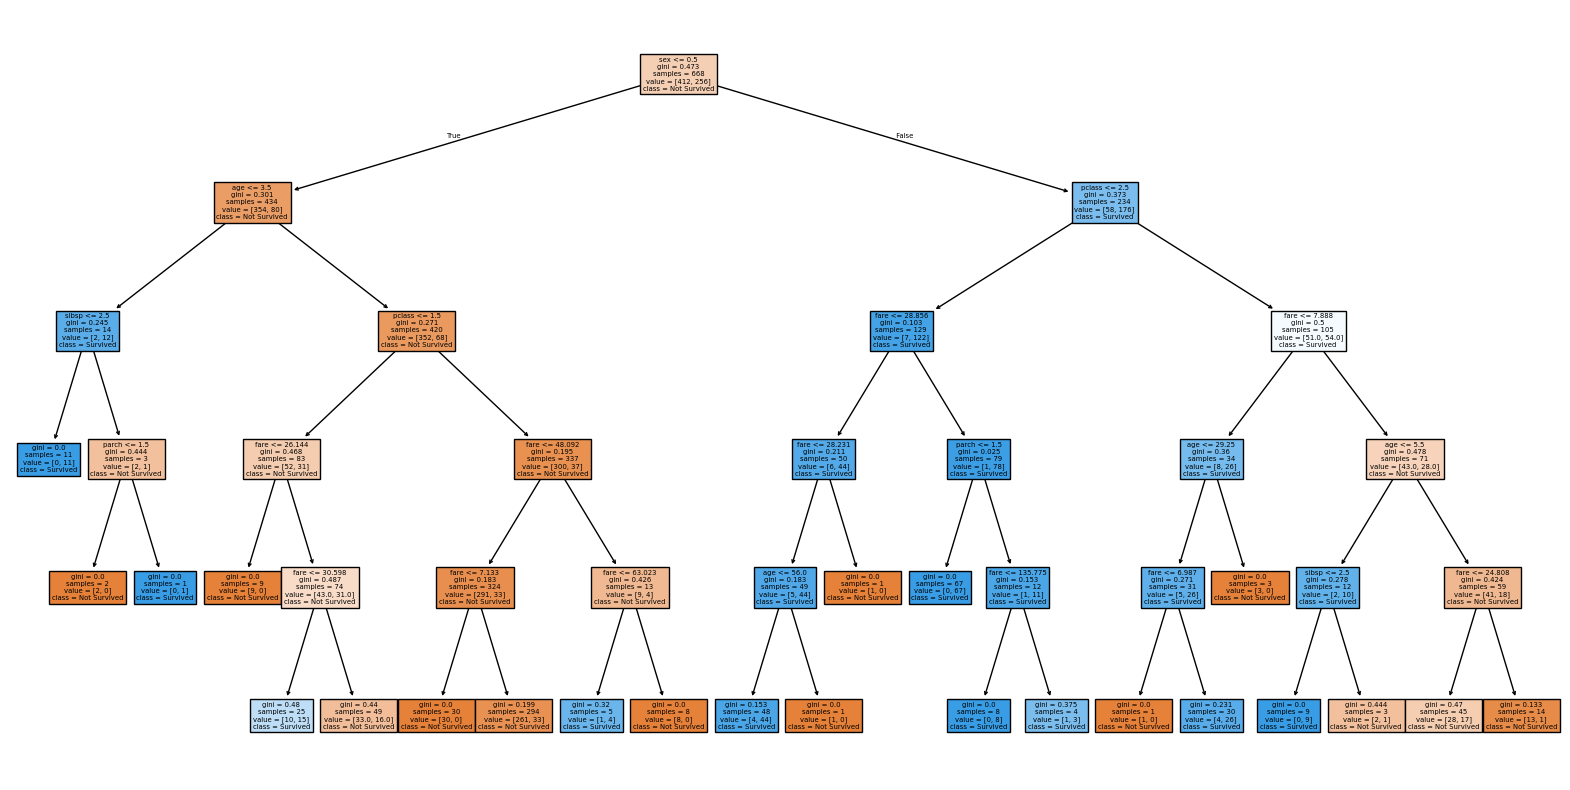

In [7]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["Not Survived","Survived"], filled=True)
plt.show()

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Random Forest Accuracy: 0.7802690582959642
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       137
           1       0.73      0.67      0.70        86

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



## Comparison

Random Forest almost always performs better than a single Decision Tree because:
- It averages many trees  
- It reduces overfitting  
- It generalizes better

## Exercise 3 — Loss Function

Decision Tree and Random Forest use:
- Gini Impurity (default)
- or Entropy

These are impurity functions, not typical loss functions.

They are used because:
- Trees pick splits that reduce impurity
- Higher Information Gain = better split